<a href="https://colab.research.google.com/github/fatjan/learn-tensorflow/blob/master/NLP_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

encoder = info.features['text'].encoder

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteODU6OK/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteODU6OK/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteODU6OK/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

padded_shapes = ([None], ())

train_dataset = train_dataset.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE,
                                                                padded_shapes=padded_shapes)

test_dataset = test_dataset.padded_batch(BATCH_SIZE, padded_shapes=padded_shapes)


In [3]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(encoder.vocab_size, 64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), 
              metrics=['accuracy'])



In [4]:
history = model.fit(train_dataset, epochs=7, validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/7
391/391 [==============================] - 50s 128ms/step - loss: 0.6138 - accuracy: 0.6384 - val_loss: 0.4231 - val_accuracy: 0.8234
Epoch 2/7
391/391 [==============================] - 50s 129ms/step - loss: 0.3310 - accuracy: 0.8678 - val_loss: 0.3443 - val_accuracy: 0.8651
Epoch 3/7
391/391 [==============================] - 50s 128ms/step - loss: 0.2524 - accuracy: 0.9060 - val_loss: 0.3358 - val_accuracy: 0.8714
Epoch 4/7
391/391 [==============================] - 50s 128ms/step - loss: 0.2092 - accuracy: 0.9262 - val_loss: 0.3322 - val_accuracy: 0.8672
Epoch 5/7
391/391 [==============================] - 50s 128ms/step - loss: 0.1863 - accuracy: 0.9342 - val_loss: 0.3348 - val_accuracy: 0.8792
Epoch 6/7
391/391 [==============================] - 50s 127ms/step - loss: 0.1608 - accuracy: 0.9460 - val_loss: 0.3549 - val_accuracy: 0.8693
Epoch 7/7
391/391 [==============================] - 51s 129ms/step - loss: 0.1435 - accuracy: 0.9529 - val_loss: 0.3780 - val_accuracy:

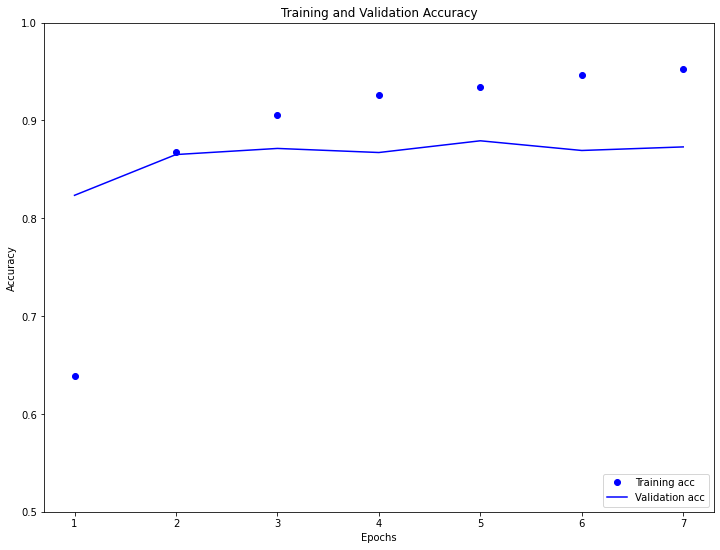

In [5]:
import io
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim(0.5, 1)
plt.show()

In [6]:
model_2 = tf.keras.Sequential([
                             tf.keras.layers.Embedding(encoder.vocab_size, 64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,
                                                                                return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), 
              metrics=['accuracy'])

history_2 = model_2.fit(train_dataset, epochs=7, validation_data=test_dataset,
                    validation_steps=30)



Epoch 1/7
391/391 [==============================] - 86s 221ms/step - loss: 0.6644 - accuracy: 0.5747 - val_loss: 0.5212 - val_accuracy: 0.7589
Epoch 2/7
391/391 [==============================] - 85s 219ms/step - loss: 0.3811 - accuracy: 0.8460 - val_loss: 0.3445 - val_accuracy: 0.8583
Epoch 3/7
391/391 [==============================] - 86s 221ms/step - loss: 0.2634 - accuracy: 0.9068 - val_loss: 0.3433 - val_accuracy: 0.8698
Epoch 4/7
391/391 [==============================] - 86s 221ms/step - loss: 0.2186 - accuracy: 0.9268 - val_loss: 0.3466 - val_accuracy: 0.8703
Epoch 5/7
391/391 [==============================] - 86s 221ms/step - loss: 0.1852 - accuracy: 0.9415 - val_loss: 0.3714 - val_accuracy: 0.8661
Epoch 6/7
391/391 [==============================] - 86s 221ms/step - loss: 0.1567 - accuracy: 0.9521 - val_loss: 0.3934 - val_accuracy: 0.8542
Epoch 7/7
391/391 [==============================] - 86s 221ms/step - loss: 0.1420 - accuracy: 0.9593 - val_loss: 0.4346 - val_accuracy:

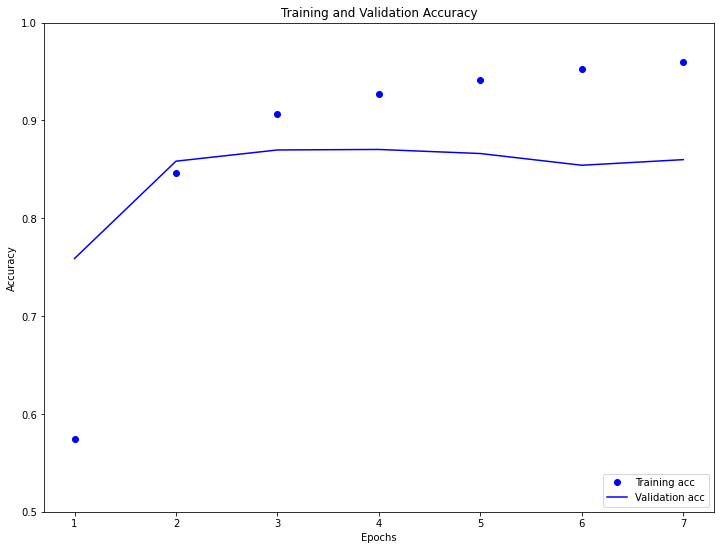

In [7]:
import io
import matplotlib.pyplot as plt

history_dict = history_2.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim(0.5, 1)
plt.show()

In [8]:
def pad_to_size(vec, size):
  zeros = [0]*(size-len(vec))
  vec.extend(zeros)
  return vec

In [9]:
def sample_predict(sentence, pad):
  encoded_sample_pred_text = encoder.encode(sentence)
  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
  return predictions

In [10]:
sample_text = ('This movie was awesome. The acting was incredible. Highly recommended.')
predictions = sample_predict(sample_text, pad=True) * 100

print('probability this is a positive review %.2f' % predictions)

sample_text = ('This movie was awesome. The acting was mediocre. Kind of boring.')
predictions = sample_predict(sample_text, pad=True) * 100

print('probability this is a positive review %.2f' % predictions)


probability this is a positive review 92.75
probability this is a positive review 21.88
